In [2]:
import seaborn as sns
from ancova import ANCOVA

# ANCOVA - Diseño a una vía de clasificación

In [3]:
# Cargar dataset
tips = sns.load_dataset("tips")

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
# Inicializar modelo ANCOVA simple
ancova_simple = ANCOVA(
    data=tips,
    response="tip",
    factor="smoker",
    covariates=["total_bill"]
)

# Ajustar modelo
ancova_simple.fit()

In [8]:
# Mostrar resultados ANOVA
print("\n=== ANCOVA Summary (One-Way) ===")
print(ancova_simple.summary())


=== ANCOVA Summary (One-Way) ===
                sum_sq     df           F        PR(>F)
C(smoker)     1.267063    1.0    1.214059  2.716289e-01
total_bill  213.674445    1.0  204.735994  4.972030e-34
Residual    251.521681  241.0         NaN           NaN


In [10]:
# Mostrar coeficientes
print("\n=== Coefficients ===")
print(ancova_simple.coefficients())


=== Coefficients ===
                    Coef.  Std.Err.          t         P>|t|    [0.025  \
Intercept        0.814299  0.186393   4.368722  1.857744e-05  0.447132   
C(smoker)[T.No]  0.148924  0.135159   1.101844  2.716289e-01 -0.117320   
total_bill       0.105722  0.007389  14.308599  4.972030e-34  0.091168   

                   0.975]  
Intercept        1.181467  
C(smoker)[T.No]  0.415169  
total_bill       0.120277  


In [11]:
# Pruebas de supuestos
print("\n=== Shapiro-Wilk Normality Test ===")
print(ancova_simple.test_normality())


=== Shapiro-Wilk Normality Test ===
{'W': np.float64(0.9650087280645618), 'p-value': np.float64(1.0957489454042946e-05), 'Normality': np.False_}


In [12]:
print("\n=== Bartlett's Test for Homoscedasticity ===")
print(ancova_simple.test_homoscedasticity())


=== Bartlett's Test for Homoscedasticity ===
{"Bartlett's stat": np.float64(22.168115767104556), 'p-value': np.float64(2.4978779017331765e-06), 'Equal variances': np.False_}


In [13]:
# Post-hoc test
print("\n=== Post-Hoc Bonferroni Test ===")
print(ancova_simple.posthoc())


=== Post-Hoc Bonferroni Test ===
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonferroni
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    No    Yes -0.0922 0.9266    0.9266  False
---------------------------------------------


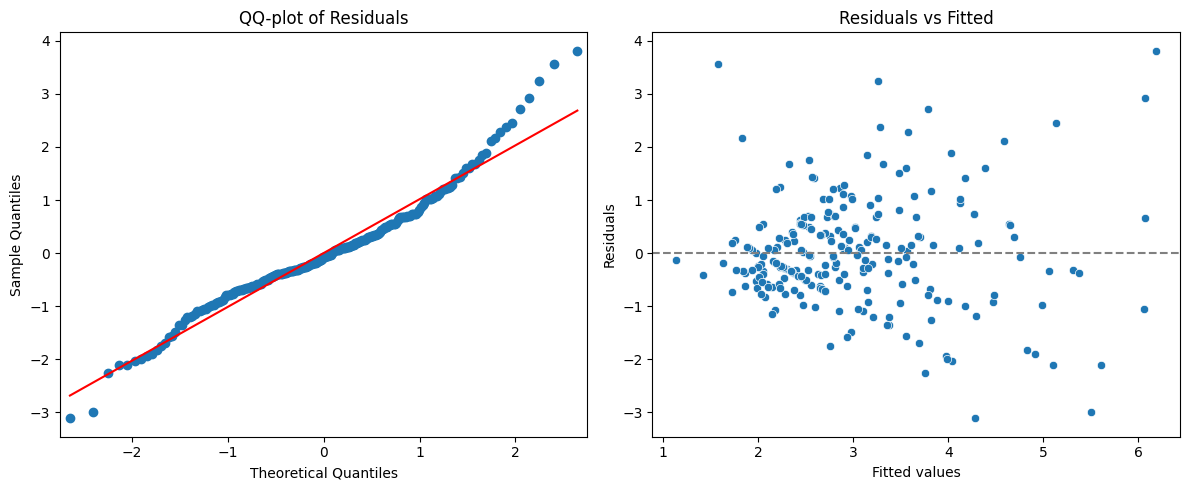

In [14]:
# Gráficos de diagnóstico
ancova_simple.plot_diagnostics()

# ANCOVA - Diseño en Bloques Completamente Al Azar

In [15]:
ancova_bloques = ANCOVA(
    data=tips,
    response="tip",
    factor="smoker",
    covariates=["total_bill"],
    block="day"
)

In [16]:
# Ajustar modelo
ancova_bloques.fit()

In [17]:
# Mostrar resultados ANOVA
print("\n=== ANCOVA Summary (With Blocking) ===")
print(ancova_bloques.summary())


=== ANCOVA Summary (With Blocking) ===
                sum_sq     df           F        PR(>F)
C(smoker)     0.990528    1.0    0.940170  3.332186e-01
C(day)        0.773654    3.0    0.244774  8.650067e-01
total_bill  204.609362    1.0  194.207024  1.122147e-32
Residual    250.748027  238.0         NaN           NaN


In [18]:
(0.773654/3)/(250.748027/238)

0.24477381298265075

In [19]:
# Mostrar coeficientes
print("\n=== Coefficients ===")
print(ancova_bloques.coefficients())


=== Coefficients ===
                    Coef.  Std.Err.          t         P>|t|    [0.025  \
Intercept        0.805051  0.221086   3.641339  3.327846e-04  0.369515   
C(smoker)[T.No]  0.139563  0.143935   0.969623  3.332186e-01 -0.143987   
C(day)[T.Fri]    0.091224  0.279331   0.326581  7.442718e-01 -0.459053   
C(day)[T.Sat]   -0.040210  0.174077  -0.230991  8.175199e-01 -0.383139   
C(day)[T.Sun]    0.087167  0.178003   0.489694  6.248012e-01 -0.263496   
total_bill       0.105476  0.007569  13.935818  1.122147e-32  0.090566   

                   0.975]  
Intercept        1.240587  
C(smoker)[T.No]  0.423113  
C(day)[T.Fri]    0.641501  
C(day)[T.Sat]    0.302718  
C(day)[T.Sun]    0.437830  
total_bill       0.120386  


In [20]:
# Pruebas de supuestos
print("\n=== Shapiro-Wilk Normality Test ===")
print(ancova_bloques.test_normality())


=== Shapiro-Wilk Normality Test ===
{'W': np.float64(0.9648620472971755), 'p-value': np.float64(1.0492187364952621e-05), 'Normality': np.False_}


In [21]:
print("\n=== Bartlett's Test for Homoscedasticity ===")
print(ancova_bloques.test_homoscedasticity())


=== Bartlett's Test for Homoscedasticity ===
{"Bartlett's stat": np.float64(21.448370669344257), 'p-value': np.float64(3.6348475462942713e-06), 'Equal variances': np.False_}


In [22]:
# Post-hoc test
print("\n=== Post-Hoc Bonferroni Test ===")
print(ancova_bloques.posthoc())


=== Post-Hoc Bonferroni Test ===
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonferroni
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    No    Yes -0.0922 0.9266    0.9266  False
---------------------------------------------


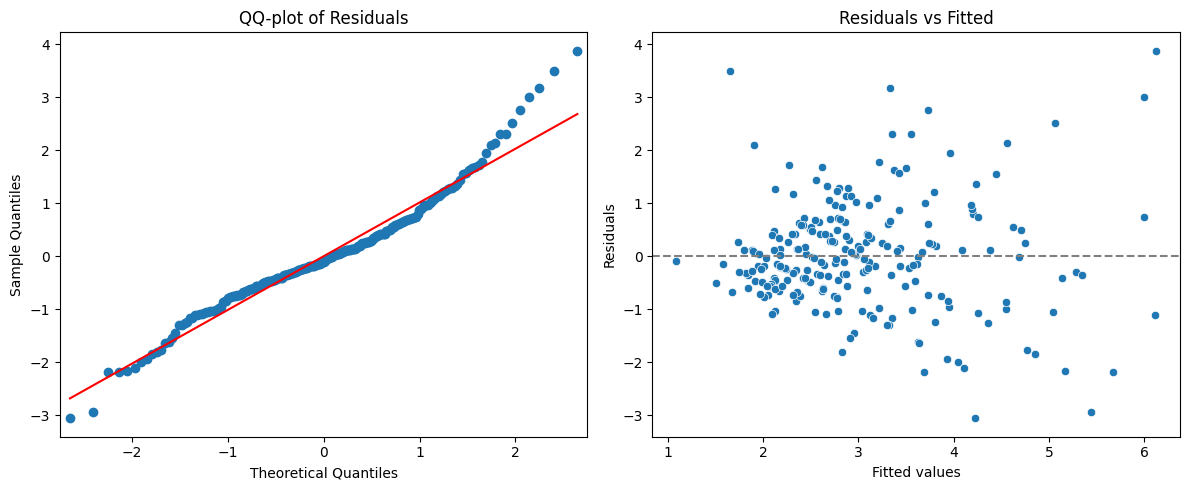

In [23]:
# Gráficos de diagnóstico
ancova_bloques.plot_diagnostics()

# MANCOVA

In [24]:
iris = sns.load_dataset("iris")

In [25]:
model = ANCOVA(
    data=iris,
    response=["sepal_length", "sepal_width"],
    factor="species",
    covariates=["petal_length", "petal_width"]
)

In [26]:
# Ajustar modelo
model.fit()

# Mostrar resultados del test MANOVA
print("\n=== MANOVA Summary ===")
print(model.summary())


=== MANOVA Summary ===
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0850 2.0000 144.0000 774.8373 0.0000
         Pillai's trace  0.9150 2.0000 144.0000 774.8373 0.0000
 Hotelling-Lawley trace 10.7616 2.0000 144.0000 774.8373 0.0000
    Roy's greatest root 10.7616 2.0000 144.0000 774.8373 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         C(species)       Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.5354 4.0000 288.0000 26.3984 0.0000
           Pillai's trace 0.4699 4.

In [27]:
iris.groupby('species')[['sepal_length','sepal_width']].mean().reset_index()

,species,sepal_length,sepal_width
0,setosa,5.006,3.428
1,versicolor,5.936,2.770
2,virginica,6.588,2.974


In [28]:
# Test de normalidad multivariada (Mardia)
print("\n=== Mardia's Test for Multivariate Normality ===")
print(model.test_multivariate_normality())


=== Mardia's Test for Multivariate Normality ===
{'Skewness stat': np.float64(40.31128248655954), 'p-value skewness': np.float64(0.0), 'Kurtosis stat': np.float64(7.343801145854614), 'z kurtosis': np.float64(-1.0045952265344988), 'Multivariate normality': np.False_}
